In [4]:
import pandas as pd
import numpy as np

import sys
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
#sys.path.append('/Users/mariasoriano/Documents/helsinki_city_bikes/src/lib')
#import functions

# Index

1. [Data Inspection](#1-data-inspection)
2. [Data Transformation](#2-data-transformation)
3. [Outlier Detection](#3-outlier-detection)
4. [Outlier Removal](#4-outlier-removal)

## 1. Data Inspection

In [6]:
data = pd.read_csv('../data/raw/helsinki_city_bikes.csv')
data.head()

/var/folders/6m/xnrf68g93dj9cnj3lwnc18b00000gn/T/ipykernel_99907/3559541780.py:1: DtypeWarning: Columns (2,4) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('../data/raw/helsinki_city_bikes.csv')


,departure,return,departure_id,departure_name,return_id,return_name,distance (m),duration (sec.),avg_speed (km/h),departure_latitude,departure_longitude,return_latitude,return_longitude,Air temperature (degC)
0,2020-03-23 06:09:44,2020-03-23 06:16:26,86,Kuusitie,111.0,Esterinportti,1747.0,401.0,0.261397,60.195245,24.901900,60.197572,24.926781,0.9
1,2020-03-23 06:11:58,2020-03-23 06:26:31,26,Kamppi (M),10.0,Kasarmitori,1447.0,869.0,0.099908,60.168610,24.930537,60.165017,24.949473,0.9
2,2020-03-23 06:16:29,2020-03-23 06:24:23,268,Porolahden koulu,254.0,Agnetankuja,1772.0,469.0,0.226695,60.195540,25.053581,60.187234,25.036412,0.9
3,2020-03-23 06:33:53,2020-03-23 07:14:03,751,Vallipolku,106.0,Korppaanmäentie,7456.0,2406.0,0.185935,60.227827,24.819614,60.203474,24.898930,0.9
4,2020-03-23 06:36:09,2020-03-23 07:04:10,62,Länsisatamankatu,121.0,Vilhonvuorenkatu,7120.0,1679.0,0.254437,60.158928,24.909692,60.186463,24.967872,0.9


In [7]:
def clean_column_name(column_name):
    column_name = column_name.lower()
    column_name = column_name.replace('(', '').replace(')', '').replace('/', '').replace(' ', '')
    return column_name

data.columns = [clean_column_name(column) for column in data.columns]

print(data.columns)


Index(['departure', 'return', 'departure_id', 'departure_name', 'return_id',
       'return_name', 'distancem', 'durationsec.', 'avg_speedkmh',
       'departure_latitude', 'departure_longitude', 'return_latitude',
       'return_longitude', 'airtemperaturedegc'],
      dtype='object')


In [8]:
# Data records go from 2016 to 2020
data['departure'].agg(['min', 'max'])

min    2016-05-02 09:31:00
max    2020-10-31 23:58:46
Name: departure, dtype: object

In [9]:
# Summary Statistics for each numerical column in the dataframe
display(data.describe().T)

,count,mean,std,min,25%,50%,75%,max
distancem,12157458.0,2295.275047,24520.672295,-4.292467e+06,1000.000000,1739.000000,2869.000000,3.681399e+06
durationsec.,12157458.0,959.775116,7346.527674,0.000000e+00,344.000000,586.000000,971.000000,5.401659e+06
avg_speedkmh,12153908.0,0.335556,34.280063,-4.689001e+02,0.146740,0.186368,0.220435,1.699104e+04
departure_latitude,12157458.0,60.179815,0.017330,6.014792e+01,60.167231,60.176080,60.189635,6.023911e+01
departure_longitude,12157458.0,24.920232,0.057641,2.472137e+01,24.909692,24.934066,24.950293,2.510620e+01
return_latitude,12157457.0,60.179708,0.017388,6.014792e+01,60.166890,60.175588,60.189635,6.023911e+01
return_longitude,12157457.0,24.920232,0.057833,2.472137e+01,24.909692,24.934066,24.950293,2.510620e+01
airtemperaturedegc,12141556.0,15.650436,5.497952,-5.200000e+00,12.300000,16.400000,19.300000,3.290000e+01


In [10]:
# Summary Statistics for each categorical column in the dataframe
display(data.describe(include=object).T)

,count,unique,top,freq
departure,12157458,8359376,2018-08-09 17:16:00,71
return,12157458,8376121,2018-08-08 17:28:00,70
departure_id,12157458,680,30,239931
departure_name,12157458,347,Itämerentori,330397
return_id,12157458.0,825.0,30.0,238094.0
return_name,12157458,348,Itämerentori,332719


## 2. Data Transformation

In [11]:
# Make some changes on the metrics that have been used in the original dataset
# by adding new columns where>
# m -> km
# sec -> min
# and everything is rounded to 1 decimal

data['distancekm']=(data['distancem'] / 1000).round(1)
data['durationmin']=(data['durationsec.'] / 60).round(1)
data['avg_speedkmh']=(data['avg_speedkmh']).round(1)
data.head()

,departure,return,departure_id,departure_name,return_id,return_name,distancem,durationsec.,avg_speedkmh,departure_latitude,departure_longitude,return_latitude,return_longitude,airtemperaturedegc,distancekm,durationmin
0,2020-03-23 06:09:44,2020-03-23 06:16:26,86,Kuusitie,111.0,Esterinportti,1747.0,401.0,0.3,60.195245,24.901900,60.197572,24.926781,0.9,1.7,6.7
1,2020-03-23 06:11:58,2020-03-23 06:26:31,26,Kamppi (M),10.0,Kasarmitori,1447.0,869.0,0.1,60.168610,24.930537,60.165017,24.949473,0.9,1.4,14.5
2,2020-03-23 06:16:29,2020-03-23 06:24:23,268,Porolahden koulu,254.0,Agnetankuja,1772.0,469.0,0.2,60.195540,25.053581,60.187234,25.036412,0.9,1.8,7.8
3,2020-03-23 06:33:53,2020-03-23 07:14:03,751,Vallipolku,106.0,Korppaanmäentie,7456.0,2406.0,0.2,60.227827,24.819614,60.203474,24.898930,0.9,7.5,40.1
4,2020-03-23 06:36:09,2020-03-23 07:04:10,62,Länsisatamankatu,121.0,Vilhonvuorenkatu,7120.0,1679.0,0.3,60.158928,24.909692,60.186463,24.967872,0.9,7.1,28.0


In [12]:
# Departure column should be a datetime type of data instead of an object
data['departure'] = pd.to_datetime(data['departure'])
# data.info()

In [13]:
# Adding new columns that will help later in the exploration / visualization process

# Month column: Displays the name of the Month
data['month'] = data['departure'].dt.month

month_map = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 
             7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}

data['month'] = data['month'].map(month_map)

In [14]:
# Year column: Display the year 
data['year'] = data['departure'].dt.year

In [15]:
# Total Bike Rentals per day
data['total_rentals'] = data.groupby(data['departure'].dt.date)['departure_id'].transform('count')

In [16]:
# Hour column: Displays the hour of the day when the rental took place (based on departure)
data['hour'] = data['departure'].dt.hour

In [17]:
# Weekday column: Displays the day of the week when the rental took place
data['weekday'] = data['departure'].dt.day_name()

    - [X/y Split](#xy-split)
    - [Train Test Split](#train-test-split)
    - [Encoder](#encoder)
    - [Standard Scaler](#standard-scaler)
    - [MinMax Scaler](#minmax-scaler)

    - [Train Prediction Score](#train-prediction-score)
    - [Test Prediction Score](#test-prediction-score)
    - [Model Performance Visualization](#model-performance-visualization)

    - [Distributions](#distributions)
    - [Logarithmic Transformation](#logarithmic-transformation)
    - [Correlation](#correlation)

## 3. Outlier Detection

In [18]:
# This function will be used to plot the outliers of the numerical columns

def plot_outliers(data):
    '''
    Plot outliers of numerical columns.
    '''
    fig,ax = plt.subplots(2,2, figsize=(6,12))
    plt.tight_layout()
    ax[0,0].set_title('Total Rentals 2020')
    sns.boxplot(y=data['total_rentals'], ax=ax[0,0])
    ax[0,1].set_title('Air temperature in Celsius')
    sns.boxplot(y=data['airtemperaturedegc'], ax=ax[0,1])
    ax[1,0].set_title('Distance in km')
    sns.boxplot(y=data['distancekm'], ax=ax[1,0])
    ax[1,1].set_title('Duration in minutes')
    sns.boxplot(y=data['distancem'], ax=ax[1,1])
    #ax[2,0].set_title('Average Speed in km/h')
    #sns.boxplot(y=data['avg_speed (km/h)'], ax=ax[2,0])

    plt.tight_layout()
    plt.show()

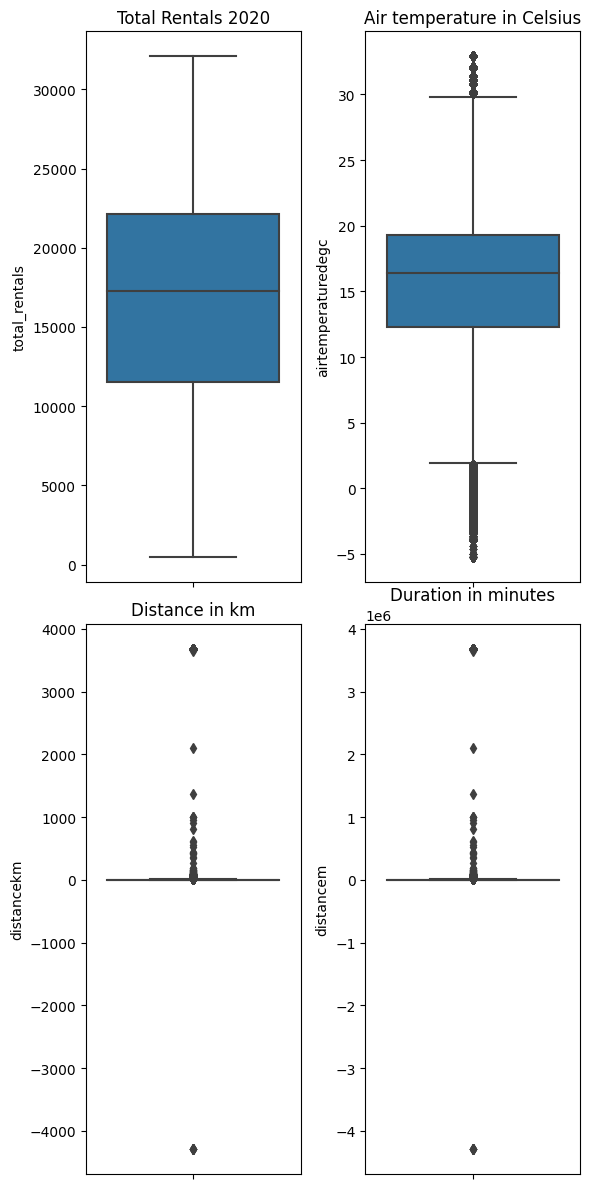

In [19]:
plot_outliers(data)

In [20]:
numerical = data.select_dtypes(np.number)
categorical = data.select_dtypes(object)

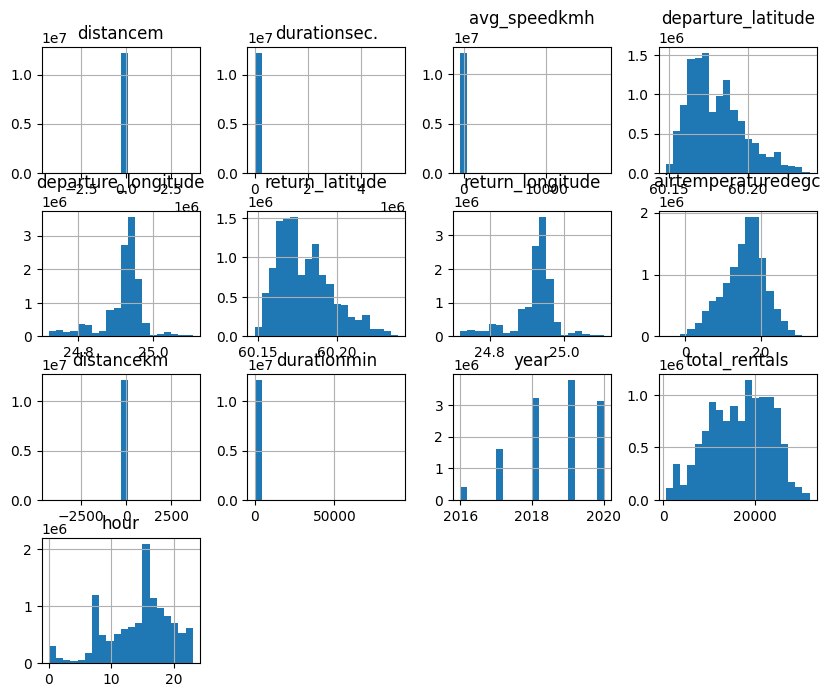

In [21]:
numerical.hist(bins=20, figsize=(10,8))
plt.show()

## 4. Outlier Removal

In [22]:
#data.head()

In [23]:
filtered_distance = data.loc[(data['distancekm'] > 0) & (data['distancekm'] < 20)]

display(data.shape)
display(filtered_distance.shape)

(12157458, 21)

(11433632, 21)

In [24]:
distance_bins = pd.cut(filtered_distance['distancekm'], bins=10)
distance_value_counts = distance_bins.value_counts()
print(distance_value_counts)

distancekm
(0.0802, 2.08]    6397433
(2.08, 4.06]      3596900
(4.06, 6.04]      1117409
(6.04, 8.02]       242285
(8.02, 10.0]        43148
(10.0, 11.98]       17815
(11.98, 13.96]       9320
(13.96, 15.94]       4808
(15.94, 17.92]       2740
(17.92, 19.9]        1774
Name: count, dtype: int64


In [25]:
display(filtered_distance['distancekm'].min())
display(filtered_distance['distancekm'].max())

0.1

19.9

In [26]:
filtered_duration = filtered_distance.loc[(data['durationmin'] > 0) & (filtered_distance['durationmin'] < 100)]

In [27]:
duration_bins = pd.cut(filtered_duration['durationmin'], bins=100)
duration_value_counts = duration_bins.value_counts()
print(duration_value_counts)

durationmin
(5.09, 6.088]       817349
(6.088, 7.086]      804040
(4.092, 5.09]       766800
(7.086, 8.084]      766361
(8.084, 9.082]      710179
                     ...  
(95.908, 96.906]       969
(94.91, 95.908]        961
(98.902, 99.9]         941
(96.906, 97.904]       868
(97.904, 98.902]       865
Name: count, Length: 100, dtype: int64


In [28]:
display(filtered_duration['durationmin'].min())
display(filtered_duration['durationmin'].max())

0.1

99.9

In [29]:
filtered_duration.head()

,departure,return,departure_id,departure_name,return_id,return_name,distancem,durationsec.,avg_speedkmh,departure_latitude,...,return_latitude,return_longitude,airtemperaturedegc,distancekm,durationmin,month,year,total_rentals,hour,weekday
0,2020-03-23 06:09:44,2020-03-23 06:16:26,86,Kuusitie,111.0,Esterinportti,1747.0,401.0,0.3,60.195245,...,60.197572,24.926781,0.9,1.7,6.7,March,2020,2552,6,Monday
1,2020-03-23 06:11:58,2020-03-23 06:26:31,26,Kamppi (M),10.0,Kasarmitori,1447.0,869.0,0.1,60.168610,...,60.165017,24.949473,0.9,1.4,14.5,March,2020,2552,6,Monday
2,2020-03-23 06:16:29,2020-03-23 06:24:23,268,Porolahden koulu,254.0,Agnetankuja,1772.0,469.0,0.2,60.195540,...,60.187234,25.036412,0.9,1.8,7.8,March,2020,2552,6,Monday
3,2020-03-23 06:33:53,2020-03-23 07:14:03,751,Vallipolku,106.0,Korppaanmäentie,7456.0,2406.0,0.2,60.227827,...,60.203474,24.898930,0.9,7.5,40.1,March,2020,2552,6,Monday
4,2020-03-23 06:36:09,2020-03-23 07:04:10,62,Länsisatamankatu,121.0,Vilhonvuorenkatu,7120.0,1679.0,0.3,60.158928,...,60.186463,24.967872,0.9,7.1,28.0,March,2020,2552,6,Monday


In [30]:
droped_speed = filtered_duration.drop('avg_speedkmh', axis=1)
#droped_speed.columns

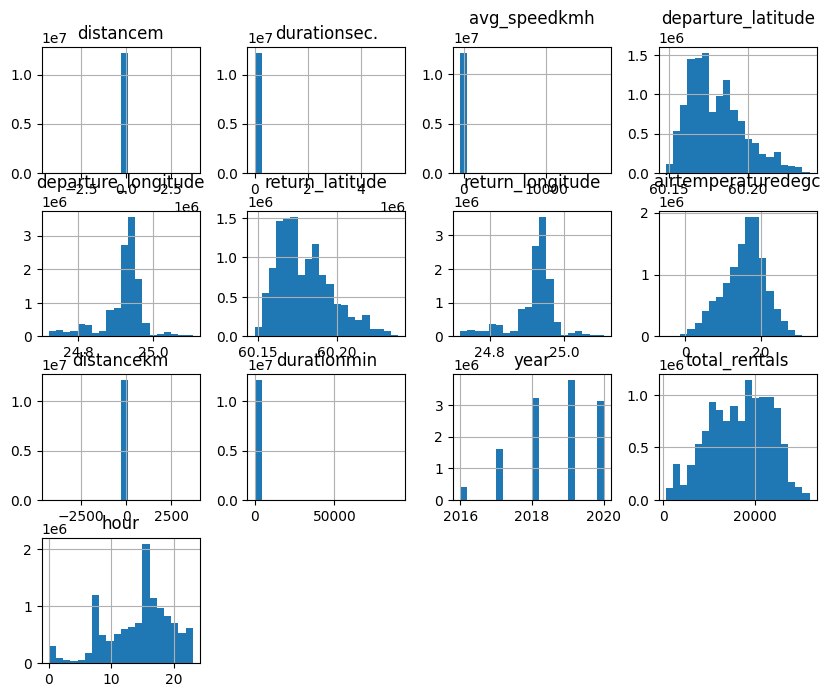

In [31]:
numerical.hist(bins=20, figsize=(10,8))
plt.show()

Upon transferring the data to Tableau to create visualizations, I detected the presence of outliers within the departure and return names. In an effort to address this issue, I performed web scraping of the website https://www.cityfillarit.fi/en/, which displays a comprehensive list of all bike stations located in Helsinki and Espoo. After compiling the station names from this source into a list, I filtered the data based on this list to remove any outliers.

While it is possible that some stations may have been added or removed between 2016 and 2020, I determined that this approach would provide a consistent and reliable dataset. Notably, the years 2016 and 2017 displayed stations that appear to be outside the bounds of Espoo and Helsinki, leading me to believe that these stations may not have existed in reality.

In [32]:
station_names = []
station_names.extend(['A.I. Virtasen aukio', 'Aalto-yliopisto (M), Korkeakouluaukio', 'Aalto-yliopisto (M), Tietotie', 'Aapraminkaari', 'Abraham Wetterin tie', 'Agnetankuja', 'Agronominkatu', 'Ahertajantie', 'Ainontie', 'Ajomiehentie', 'Ala-Malmin tori', 'Alakiventie', 'Albertinkatu', 'Alppikylä', 'Annankatu', 'Ansatie', 'Antaksentie', 'Apollonkatu', 'Arabian kauppakeskus', 'Arabiankatu', 'Arielinkatu', 'Asentajanpuisto', 'Aulangontie', 'Auringonkatu', 'Aurinkokivenpiha', 'Aurinkolahdenaukio', 'Aurinkotuulenkatu', 'Avaruuskatu', 'Avia-aukio', 'Baana', 'Bermudankuja', 'Betonimies', 'Brahen kenttä', 'Brahen puistikko', 'Cygnaeuksenkatu', 'Derby Business Park', 'Designmuseo', 'Diakoniapuisto', 'Eerikinkatu', 'Ehrenströmintie', 'Elfvik', 'Elimäenkatu', 'Eläinmuseo', 'Energia Areena', 'Erottajan aukio', 'Eränkävijäntori', 'Esterinportti', 'Eteläesplanadi', 'Etuniementie', 'Etupellonpuisto', 'Fleminginkatu', 'Friisilänaukio', 'Gallen-Kallelan tie', 'Gebhardinaukio', 'Golfpolku', 'Gransinmäki', 'Gunillantie', 'Gyldenintie', 'Haagan tori', 'Haakoninlahdenkatu', 'Haapaniemenkatu', 'Haapasaarentie', 'Hagalundinpuisto', 'Hagelstaminpuisto', 'Hagelstamintie', 'Hakalehto', 'Hakaniemi (M)', 'Hakuninmaa', 'Halkaisijantie', 'Halmetie', 'Hanasaari', 'Hankasuontie', 'Hauenkallio', 'Hauenkalliontie', 'Haukilahdenaukio', 'Haukilahdenkatu', 'Haukilahdenranta', 'Haukilahdensolmu', 'Heikinlaakso', 'Heikkilänaukio', 'Heikkiläntie', 'Helluntairaitti', 'Hernepellontie', 'Hernesaarenranta', 'Hernetie', 'Hertanmäenkatu', 'Herttoniemen kirkko', 'Herttoniemenranta', 'Herttoniemi (M)', 'Heureka', 'Hiekkaharjun asema', 'Hiekkaharjun liikuntapuisto', 'Hiekkatie', 'Hietalahdentori', 'Hietaniemenkatu', 'Honkasuo', 'Honkasuo', 'Huhtakuja', 'Humalniementie', 'Humikkalankuja', 'Huopalahden asema', 'Huopalahdentie', 'Huovitie', 'Hämeenlinnanväylä', 'Ida Aalbergin tie', 'Ilmalan asema', 'Innopoli', 'Intiankatu', 'Isoisänsilta', 'Itäkeskus (M)', 'Itäkeskus Metrovarikko', 'Itälahdenkatu', 'Itämerentori', 'Itäportti', 'Jakomäentie', 'Jakomäki', 'Jalavatie', 'Jokiniemenkatu', 'Jokipellontie', 'Jollas', 'Juhana Herttuan tie', 'Jumbo P1-taso', 'Jumbo P3-taso', 'Jämeräntaival', 'Jännetie', 'Jätkäsaarenlaituri', 'Jäähalli', 'Kaapelitehdas', 'Kaisaniemenpuisto', 'Kaivokselantie', 'Kaivonkatsojanpuisto', 'Kaivopuisto', 'Kalannintie', 'Kalasatama (M)', 'Kalevalantie', 'Kalevankatu', 'Kalkkihiekantie', 'Kalkkipellonmäki', 'Kamppi (M)', 'Kanavaranta', 'Kannelmäen asema', 'Kannelmäen liikuntapuisto', 'Kansallismuseo', 'Kapteeninpuistikko', 'Karhulantie', 'Karhusuontie', 'Kartanonkosken liikuntapuisto', 'Karviaistie', 'Kasarmitori', 'Katariina Saksilaisen katu', 'Kauppakeskus Columbus', 'Kauppakeskus Kaari', 'Kauppakorkeakoulu', 'Kauppalaivurintie', 'Kaustisentie', 'Keilalahti', 'Keilaniemi (M)', 'Keilaranta', 'Kesäkatu', 'Kiasma', 'Kilterinaukio', 'Kirkkoherrantie', 'Kiskanpuisto', 'Kiskontie', 'Kivikon liikuntapuisto', 'Kivikonkaari', 'Kivikonlaita', 'Kivistön asema', 'Koetilankuja', 'Koivu-Mankkaa', 'Koivukylän asema', 'Koivusaari (M)', 'Koivutori', 'Koivuvaarankuja', 'Komeetankatu', 'Komentajankatu', 'Kontula (M)', 'Kontulankaari', 'Korjaamo', 'Korkeasaari', 'Korppaanmäentie', 'Koskelan varikko', 'Koskelantie', 'Kotinummentie', 'Koukkusaarentie', 'Kriikunakuja', 'Kuikkarinne', 'Kukinkuja', 'Kulosaari (M)', 'Kulttuuriaukio', 'Kuninkaantammi', 'Kuohukuja', 'Kurjenpolvenpuisto', 'Kurkijoentie', 'Kurkimäentie', 'Kurkimäki', 'Kustaankartano', 'Kustaankatu', 'Kutsuntatie', 'Kuunkatu', 'Kuusisaari', 'Kuusitie', 'Kydönaukio', 'Kylävoudintie', 'Käpylän asema', 'Käpyläntie', 'Kössi Koskisen aukio', 'Laajalahden aukio', 'Laajalahden keskus', 'Laajasalon ostoskeskus', 'Laajavuorentie', 'Laivalahden puistotie', 'Laivasillankatu', 'Lallukankuja', 'Lammasrinne', 'Lastenlehto', 'Laulurastaantie', 'Lauttasaaren ostoskeskus', 'Lauttasaarensilta', 'Lehtisaarentie', 'Leikosaarentie', 'Leinelän asema', 'Leinikkitie', 'Lepolantie', 'Leppäsuonaukio', 'Leppävaaran uimahalli', 'Leppävaaran urheilupuisto', 'Leppävaaranaukio', 'Leppävaarankäytävä', 'Lettopolku', 'Liesikuja', 'Liisanpuistikko', 'Liljatie', 'Lincolninaukio', 'Linnakepolku', 'Linnanmäki', 'Linnuntie', 'Lintulahdenkatu', 'Lokitie', 'Louhelan asema', 'Louhentori', 'Luhtimäki', 'Lukutori', 'Luoteisväylä', 'Lystimäensilta', 'Lystimäki', 'Läkkitori', 'Länsisatamankatu', 'Länsisatamankuja', 'Länsiterminaali', 'Länsituuli', 'Maalitori', 'Maarinranta', 'Maatullinkuja', 'Maistraatintori', 'Maitikka-aukio', 'Majurinkulma', 'Malmin asema', 'Malmin sairaala', 'Malminiitynpolku', 'Malminiitynpuisto', 'Malminkartanon asema', 'Malminkartanonhuippu', 'Mamsellimyllynkatu', 'Mankkaanaukio', 'Mankkaanlaaksontie', 'Mannerheimintie', 'Margareetankuja', 'Marian sairaala', 'Marjaniementie', 'Marjaniemi', 'Martinkyläntie', 'Martinlaakson asema', 'Martinlaakson uimahalli', 'Martinlaaksontie', 'Marttila', 'Mastokatu', 'Matinkartanontie', 'Matinkyläntie', 'Matinlahdenranta', 'Maunula', 'Maununneva', 'Meilahden sairaala', 'Melkonkuja', 'Mellstenintie', 'Mellunmäki (M)', 'Meri-Rastilan tori', 'Merihaka', 'Meripihkatori', 'Merisotilaantori', 'Messeniuksenkatu', 'Mestarinkatu', 'Mestarintie', 'Metsänneidonpolku', 'Mikkolantie', 'Mosaiikkitori', 'Munkkiniemen aukio', 'Munkkivuoren ostoskeskus', 'Muotoilijankatu', 'Mustikkamaa', 'Muurarinkuja', 'Muusantori', 'Myllypuro (M)', 'Myyrmäen asema', 'Myyrmäen jäähalli', 'Myyrmäen uimahalli', 'Mäkelänkatu', 'Mäkitorpantie', 'Mäkkylän asema', 'Mäntyviita', 'Narinkka', 'Nelikkotie', 'Niittykumpu (M)', 'Niittymaa', 'Nokkala', 'Nordenskiöldinaukio', 'Nuijatie', 'Nuottaniementie', 'Näkinsilta', 'Näyttelijäntie', 'Olarinluoma', 'Oljenkorsi', 'Ollaksentie', 'Olympiastadion', 'Ooppera', 'Opastinsilta', 'Oravannahkatori', 'Orionintie', 'Orpaanporras', 'Osumakuja', 'Otaranta', 'Otsolahti', 'Otto Brandtin tie', 'Oulunkylän asema', 'Outotec', 'Paavalinpuisto', 'Paciuksenkaari', 'Paciuksenkatu', 'Painiitty', 'Pajamäki', 'Pajupillintie', 'Pakkalan puistotie', 'Paloheinän kirjasto', 'Paloheinän maja', 'Paloheinäntie', 'Pasilan asema', 'Pernajantie', 'Perämiehenkatu', 'Petikontie', 'Petter Wetterin tie', 'Peukaloisentie', 'Pihlajamäki', 'Piikintie', 'Piispankallio', 'Piispanportti', 'Piispansilta', 'Pirkkolan liikuntapuisto', 'Pitäjänmäen asema', 'Pohjankulma', 'Pohjois-Haagan asema', 'Pohjolanaukio', 'Pohjolankatu', 'Porolahden koulu', 'Porthania', 'Porvarintie', 'Postipuisto', 'Postipuun koulu', 'Prinsessantie', 'Puistokaari', 'Puistolan VPK', 'Puistolan asema', 'Pukinmäen asema', 'Pukinmäen liikuntapuisto', 'Punakiventie', 'Puotila (M)', 'Puotilan ostoskeskus', 'Puotilantie', 'Puotinharju', 'Puotinkylän kartano', 'Purjetie', 'Puutarhatie', 'Pyhtäänkorventie', 'Pähkinärinteen kirjasto', 'Päijänteentie', 'Radiokatu', 'Rajasaarentie', 'Ramsinniementie', 'Rapakiventie', 'Rastila (M)', 'Ratapihantie', 'Ratsutori', 'Rautatieläisenkatu', 'Rautatientori / itä', 'Rautatientori / länsi', 'Reiherintie', 'Rekolan asema', 'Relanderinaukio', 'Revontulentie', 'Riistakuja', 'Rillitori', 'Ritarikatu', 'Robert Huberin tie', 'Roihupelto', 'Rubiinipuisto', 'Rukatunturintie', 'Rummunlyöjänkatu', 'Ruomelantie', 'Ruskeasuon varikko', 'Ruutikatu', 'Rälssitie', 'Sairaalakatu', 'Sallatunturintie', 'Salmisaarenranta', 'Sammonpuistikko', 'Sananjalanpolku', 'Saniaiskuja', 'Sateenkaarentie', 'Sateentie', 'Saunalahdentie', 'Sauvatie', 'Savela', 'Senaatintori', 'Sepetlahdentie', 'Sepänkatu', 'Seurasaari', 'Siilitie (M)', 'Siilitie 13', 'Siilitie 9', 'Siltamäki', 'Siltavoudintie', 'Silvola', 'Sinkilätie', 'Sofianlehdonkatu', 'Sompasaari', 'Stenbäckinkatu', 'Sumukuja', 'Suokalliontie', 'Suomenlahdentie', 'Suopursunaukio', 'Suurpellonaukio', 'Syystie', 'Sähkömies', 'Säteri', 'Säterinniitty', 'Säterinrinne', 'Sörnäinen (M)', 'Tahkotie', 'Takomotie', 'Talkootori', 'Tammisalon aukio', 'Tammiston kauppatie', 'Tammistonkatu', 'Tammistontie', 'Tapanilan asema', 'Tapaninkyläntie', 'Tapiolan urheilupuisto', 'Tapionaukio', 'Tarhurinaukio', 'Tasetie', 'Teerisuontie', 'Tekniikantie', 'Teknobulevardi', 'Teletie', 'Teljäntie', 'Tenholantie', 'Teollisuuskatu', 'Teurastamo', 'Thalianaukio', 'Tietäjä', 'Tiistiläntie', 'Tiistinkallio', 'Tikkurilan asema', 'Tikkurilan urheilupuisto', 'Tilkantori', 'Tilkanvierto', 'Tilketori', 'Toinen linja', 'Tollinpolku', 'Tontunmäentie', 'Toppelundinportti', 'Toppelundintie', 'Torpanranta', 'Torpparinmäentie', 'Trumpettikuja', 'Tulisuontie', 'Tunnelitie', 'Tuohipolku', 'Tupasaarentie', 'Tuukkalantie', 'Tuulimäki', 'Tuupakankuja', 'Tyynenmerenkatu', 'Töyrynummentie', 'Töyrynummi', 'Töölönkatu', 'Töölönlahden puisto', 'Töölönlahdenkatu', 'Töölöntori', 'Töölöntulli', 'Uimastadion', 'Ulappasilta', 'Ulvilantie', 'Unioninkatu', 'Upseerinkatu', 'Urhea-kampus', 'Urheilupuisto (M)', 'Urheilutie', 'Vaisala', 'Valimon asema', 'Valimotie', 'Vallikatu', 'Vallilan\xa0varikko', 'Vallipolku', 'Vanha Kauppahalli', 'Vanha Tapanilantie', 'Vanha Viertotie', 'Vanha kirkkopuisto', 'Vantaankosken asema', 'Vantaanlaaksontie', 'Vantaanpuisto', 'Varsapuistikko', 'Vartioharjuntie', 'Varustuksentie', 'Vehkalan asema', 'Velodrominrinne', 'Venttiilikuja', 'Verkatehtaanpuisto', 'Verkkosaari', 'Vesakkotie', 'Vetokuja', 'Vihdintie', 'Viikin normaalikoulu', 'Viikin tiedepuisto', 'Viiskulma', 'Vilhonvuorenkatu', 'Viljelijäntie', 'Virnatie', 'Voikukantie', 'Von Daehnin katu', 'Vuorimestarintori', 'Vuosaaren liikuntapuisto', 'Vuosaaren puistopolku', 'Vähäntuvantie', 'Väinö Tannerin tie', 'Välimerenkatu', 'Väärämäentie', 'Westendinasema', 'Westendintie', 'Yhdyskunnankuja', 'Ympyrätalo'])

#station_names

In [33]:
mask = droped_speed['departure_name'].isin(station_names)
invert_mask = ~mask
missing_stations = droped_speed[invert_mask][['departure_name']]
missing_stations

,departure_name
96,Eteläinen Hesperiankatu
131,Eteläinen Hesperiankatu
251,Eteläinen Hesperiankatu
268,Eteläinen Hesperiankatu
340,Hollolantie
...,...
12156867,Karhupuisto
12157142,Eteläinen Hesperiankatu
12157154,Eteläinen Hesperiankatu
12157333,Karhupuisto


In [34]:
data_clean = droped_speed[droped_speed['departure_name'].isin(station_names)]

In [35]:
display(droped_speed.shape)
display(data_clean.shape)

(11345661, 20)

(11180360, 20)

In [36]:
data_clean.isnull().sum()

departure                  0
return                     0
departure_id               0
departure_name             0
return_id                  0
return_name                0
distancem                  0
durationsec.               0
departure_latitude         0
departure_longitude        0
return_latitude            1
return_longitude           1
airtemperaturedegc     14613
distancekm                 0
durationmin                0
month                      0
year                       0
total_rentals              0
hour                       0
weekday                    0
dtype: int64

In [37]:
data_clean.dropna(inplace=True)
data_clean.reset_index(drop=True, inplace=True)

print(data_clean.shape)
print(data_clean.isnull().sum())

/var/folders/6m/xnrf68g93dj9cnj3lwnc18b00000gn/T/ipykernel_99907/4221202513.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean.dropna(inplace=True)


(11165746, 20)
departure              0
return                 0
departure_id           0
departure_name         0
return_id              0
return_name            0
distancem              0
durationsec.           0
departure_latitude     0
departure_longitude    0
return_latitude        0
return_longitude       0
airtemperaturedegc     0
distancekm             0
durationmin            0
month                  0
year                   0
total_rentals          0
hour                   0
weekday                0
dtype: int64


In [38]:
#final clean data
data_clean.to_csv('data_clean.csv', index=False)

In [39]:
# Filter data based on year and create new dataframes
rentals_2020 = data_clean[data_clean['departure'].dt.year == 2020]
rentals_2019 = data_clean[data_clean['departure'].dt.year == 2019]
rentals_2018 = data_clean[data_clean['departure'].dt.year == 2018]
rentals_2017 = data_clean[data_clean['departure'].dt.year == 2017]
rentals_2016 = data_clean[data_clean['departure'].dt.year == 2016]